In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

/home/simone/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset = pd.read_json('/home/simone/Desktop/wordCountEmbedding.json')

In [3]:
toRemove = []
for i, row in dataset.iterrows():
    if(i % 100 == 0):
        print(i)
    dataset['EMBEDDING'].at[i] = dataset['EMBEDDING'].at[i][0]
    if(dataset['EMBEDDING'][i][0]==None):
        toRemove.append(i)
    #Troppi sample con tutto a 0, ne rimuovo 2/3
    if(dataset['NEGATIVE'][i]+dataset['POSITIVE'][i]+dataset['CONSTRAINING'][i]
           +dataset['LITIGIOUS'][i]+dataset['UNCERTAINTY'][i] == 0):
        if(random.random() < 0.7):
            toRemove.append(i)


dataset = dataset.drop(toRemove)

0
100
1000
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
1100
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
1200
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
1300
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
1400
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
1500
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
1600
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
1700
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
1800
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
1900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
200
2000
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
2100
21000
21100
21200
21300
21400
21500
21600
21700
21800
21900
2200
22000
22100
22200
22300
22400
22500
22600
22700
22800
22900
2300
23000
23100
23200
23300
23400
23500
23600
23700
23800
23900
2400
24000
24100
24200
24300
24400
24500
24600
24700
24800
24900
2500
25000
2510

In [4]:
tot = 0
for i, row in dataset.iterrows():
    if(dataset['NEGATIVE'][i]+dataset['POSITIVE'][i]+dataset['CONSTRAINING'][i]
           +dataset['LITIGIOUS'][i]+dataset['UNCERTAINTY'][i] == 0):
        tot +=1
        
print(tot)
print(len(dataset))

2886
21709


In [5]:
import math
y_label = ['NEGATIVE','POSITIVE', 'CONSTRAINING','LITIGIOUS','UNCERTAINTY']

idx_split = math.floor(len(dataset)*(0.7))

train_x = dataset['EMBEDDING'][:idx_split].tolist()
train_y =dataset[y_label][:idx_split]
test_x = dataset['EMBEDDING'][idx_split:].tolist()
test_y = dataset[y_label][idx_split:]




In [6]:
import matplotlib.pyplot as plt


0.12835866
Epoch: 0001 training cost= 0.749609351 test cost= 0.257318109
0.12835866
Epoch: 0002 training cost= 0.512114704 test cost= 0.257318109
0.12835866
Epoch: 0003 training cost= 0.512114704 test cost= 0.257318109
0.12835866
Epoch: 0004 training cost= 0.512114704 test cost= 0.257318109
0.12835866
Epoch: 0005 training cost= 0.512114704 test cost= 0.257318109
0.12835866
Epoch: 0006 training cost= 0.512114704 test cost= 0.257318109
0.12835866
Epoch: 0007 training cost= 0.512094706 test cost= 0.257318109
0.12835866
Epoch: 0008 training cost= 0.512094706 test cost= 0.257318109
0.12835866
Epoch: 0009 training cost= 0.512094706 test cost= 0.257318109
0.12835866
Epoch: 0010 training cost= 0.512094706 test cost= 0.257318109
0.1285122
Epoch: 0011 training cost= 0.512094706 test cost= 0.257287413
0.1285122
Epoch: 0012 training cost= 0.512074709 test cost= 0.257287413
0.12912637
Epoch: 0013 training cost= 0.512068063 test cost= 0.257225990
0.1292799
Epoch: 0014 training cost= 0.511991084 test

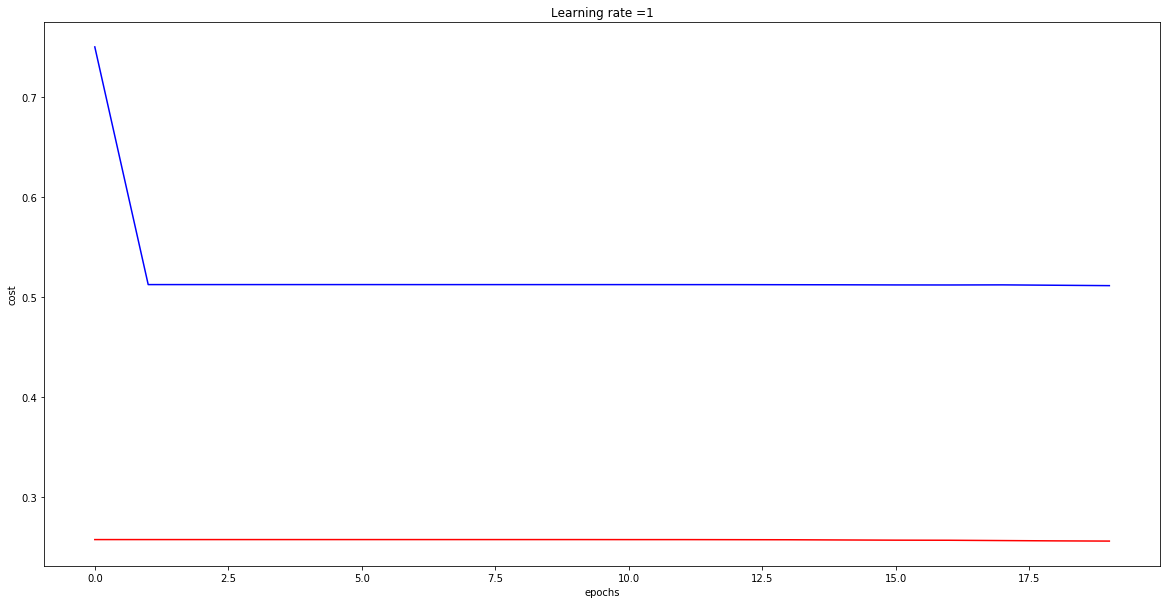

In [21]:
learning_rate = 1
training_epochs = 20
batch_size = 10000
display_step = 1

# Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 512 # 2nd layer number of neurons
n_input = 2400
n_classes = 5

X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=5)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=5)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=5))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1],stddev=5)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2],stddev=5)),
    'out': tf.Variable(tf.random_normal([n_classes],stddev=5))
}

def random_mini_batches(X_train, Y_train, minibatch_size):
    minibatches = list()

    m = int(len(X_train))
    if(minibatch_size > m):
        minibatches.append((X_train, Y_train))
        return minibatches

    minibatches.append((X_train[0:minibatch_size], Y_train[0:minibatch_size]))
    iterSize = minibatch_size
    while(iterSize < m):
        if(iterSize+minibatch_size < m):
            minibatches.append((X_train[iterSize:iterSize+minibatch_size], Y_train[iterSize:iterSize+minibatch_size]))
            iterSize += minibatch_size
        else:
            minibatches.append((X_train[iterSize:m],Y_train[iterSize:m]))
            iterSize = m
    return minibatches


def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.sigmoid(tf.add(tf.matmul(layer_2, weights['out']), biases['out']))
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.squared_difference(logits, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()


correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


accuracy_train = []
accuracy_test = []
with tf.Session() as sess:
    sess.run(init)
    num_minibatches = int(len(train_x) / batch_size)
    if(num_minibatches == 0):
        num_minibatches = 1
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        minibatches = random_mini_batches(train_x,train_y, batch_size)
        # Loop over all batches
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            minibatch_X = np.asarray(minibatch_X)            
            minibatch_Y = np.asarray(minibatch_Y).reshape((len(minibatch_Y), n_classes))
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: minibatch_X, Y: minibatch_Y})
            # Compute average loss
            #print(c)
            avg_cost += c / num_minibatches
        # Display logs per epoch step
        if epoch % display_step == 0:
            accuracy_train.append(avg_cost)
            test_loss = sess.run(loss_op, feed_dict={X: test_x, Y: test_y})
            accuracy_test.append(test_loss)
            print(sess.run(accuracy, feed_dict={X: test_x, Y: test_y}))
            print("Epoch:", '%04d' % (epoch+1), "training cost= {:.9f}".format(avg_cost), "test cost= {:.9f}".format(test_loss))
    print("Optimization Finished!")
    pred = sess.run(logits, feed_dict={X: test_x, Y: test_y})
    print(test_y[:10])
    print(pred[:10])
    # Test model
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, training_epochs), accuracy_train,'b')
plt.plot(np.arange(0, training_epochs), accuracy_test,'r')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.title("Learning rate =" + str(learning_rate))
plt.show()